# Project 3: Semi-Structure Data Analytics 
### Dataset: MongoDB sample dataset (sample_supplies:sales)

#### 5 analytical questions. 
#### 1. Show top 10 products (name) sales (quantity x price). 
#### 2. Show top 3 products (name) sales by store (location). 
#### 3. Show rankings of each store (location). 
#### 4. Show purchased method by gender table 
#### 5. Show monthly total sales 

In [1]:
import csv
import pandas as pd

In [3]:
data = pd.read_json('project3.json', lines=True)

In [4]:
data

,_id,saleDate,items,storeLocation,customer,couponUsed,purchaseMethod
0,{'$oid': '5bd761dcae323e45a93ccfe8'},{'$date': '2015-03-23T21:06:49.506Z'},"[{'name': 'printer paper', 'tags': ['office', ...",Denver,"{'gender': 'M', 'age': 42, 'email': 'cauho@wit...",True,Online
1,{'$oid': '5bd761dcae323e45a93ccfe9'},{'$date': '2015-08-25T10:01:02.918Z'},"[{'name': 'envelopes', 'tags': ['stationary', ...",Seattle,"{'gender': 'M', 'age': 50, 'email': 'keecade@h...",False,Phone
2,{'$oid': '5bd761dcae323e45a93ccfea'},{'$date': '2017-06-22T09:54:14.185Z'},"[{'name': 'notepad', 'tags': ['office', 'writi...",Denver,"{'gender': 'M', 'age': 51, 'email': 'worbiduh@...",False,In store
3,{'$oid': '5bd761dcae323e45a93ccfeb'},{'$date': '2015-02-23T09:53:59.343Z'},"[{'name': 'binder', 'tags': ['school', 'genera...",Seattle,"{'gender': 'F', 'age': 45, 'email': 'vatires@t...",False,In store
4,{'$oid': '5bd761dcae323e45a93ccfec'},{'$date': '2017-12-03T18:39:48.253Z'},"[{'name': 'backpack', 'tags': ['school', 'trav...",London,"{'gender': 'M', 'age': 40, 'email': 'dotzu@ib....",False,In store
...,...,...,...,...,...,...,...
4995,{'$oid': '5bd761deae323e45a93ce36b'},{'$date': '2016-01-20T17:29:10.225Z'},"[{'name': 'pens', 'tags': ['writing', 'office'...",Austin,"{'gender': 'F', 'age': 45, 'email': 'du@rum.py...",False,In store
4996,{'$oid': '5bd761deae323e45a93ce36c'},{'$date': '2014-11-29T10:09:41.573Z'},"[{'name': 'pens', 'tags': ['writing', 'office'...",Denver,"{'gender': 'F', 'age': 47, 'email': 'dup@katje...",False,In store
4997,{'$oid': '5bd761deae323e45a93ce36d'},{'$date': '2017-12-25T07:02:51.283Z'},"[{'name': 'binder', 'tags': ['school', 'genera...",Denver,"{'gender': 'M', 'age': 29, 'email': 'losuhse@e...",False,In store
4998,{'$oid': '5bd761deae323e45a93ce36e'},{'$date': '2013-12-07T11:06:25.51Z'},"[{'name': 'notepad', 'tags': ['office', 'writi...",Denver,"{'gender': 'M', 'age': 59, 'email': 'hu@pehabu...",False,Online


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   _id             5000 non-null   object
 1   saleDate        5000 non-null   object
 2   items           5000 non-null   object
 3   storeLocation   5000 non-null   object
 4   customer        5000 non-null   object
 5   couponUsed      5000 non-null   bool  
 6   purchaseMethod  5000 non-null   object
dtypes: bool(1), object(6)
memory usage: 239.4+ KB


In [30]:
# Define the CSV file path
data_csv = "sales.csv"

# Define the CSV field names (column names)
fieldnames = [
    "itemsName", "itemsQuantity", "itemsPrice",
    "storeLocation", "customerGender", "customerAge",
    "customerEmail", "customerSatisfaction",
    "saleDate", "purchaseMethod", "couponUsed"
]

In [33]:
print(row)

itemsName                          printer paper
itemsQuantity                                  2
itemsPrice                                 40.01
storeLocation                             Denver
customerGender                                 M
customerAge                                   42
customerEmail                   cauho@witwuta.sv
customerSatisfaction                           4
saleDate                2015-03-23T21:06:49.506Z
purchaseMethod                            Online
couponUsed                                  True
Name: 0, dtype: object


In [34]:
# Initialize the list to store flattened data
flattened_data = []

# Iterate through the DataFrame
for index, row in data.iterrows():
    # Extract item information from the row
    item_name = row["itemsName"]
    item_quantity = row["itemsQuantity"]
    item_price = row["itemsPrice"]
    
    store_location = row["storeLocation"]
    customer_gender = row["customerGender"]
    customer_age = row["customerAge"]
    customer_email = row["customerEmail"]
    customer_satisfaction = row["customerSatisfaction"]
    sale_date = row["saleDate"]
    purchase_method = row["purchaseMethod"]
    coupon_used = row["couponUsed"]

    flattened_row = {
        "itemsName": item_name,
        "itemsQuantity": item_quantity,
        "itemsPrice": item_price,
        "storeLocation": store_location,
        "customerGender": customer_gender,
        "customerAge": customer_age,
        "customerEmail": customer_email,
        "customerSatisfaction": customer_satisfaction,
        "saleDate": sale_date,
        "purchaseMethod": purchase_method,
        "couponUsed": coupon_used
    }
    flattened_data.append(flattened_row)


In [36]:
# Write the data to the CSV file
with open(data_csv, mode='w', newline='') as csv_file:
    writer = csv.DictWriter(csv_file, fieldnames=fieldnames)
    writer.writeheader()
    writer.writerows(flattened_data)

print("exported to", data_csv)

# Load the CSV data into a Pandas DataFrame
data = pd.read_csv('sales.csv')
data

exported to sales.csv


,itemsName,itemsQuantity,itemsPrice,storeLocation,customerGender,customerAge,customerEmail,customerSatisfaction,saleDate,purchaseMethod,couponUsed
0,printer paper,2,40.01,Denver,M,42,cauho@witwuta.sv,4,2015-03-23T21:06:49.506Z,Online,True
1,notepad,2,35.29,Denver,M,42,cauho@witwuta.sv,4,2015-03-23T21:06:49.506Z,Online,True
2,pens,5,56.12,Denver,M,42,cauho@witwuta.sv,4,2015-03-23T21:06:49.506Z,Online,True
3,backpack,2,77.71,Denver,M,42,cauho@witwuta.sv,4,2015-03-23T21:06:49.506Z,Online,True
4,notepad,2,18.47,Denver,M,42,cauho@witwuta.sv,4,2015-03-23T21:06:49.506Z,Online,True
...,...,...,...,...,...,...,...,...,...,...,...
27433,envelopes,5,24.12,New York,M,33,lihzodud@voblep.ie,3,2014-08-18T06:25:49.739Z,Online,False
27434,pens,4,27.10,New York,M,33,lihzodud@voblep.ie,3,2014-08-18T06:25:49.739Z,Online,False
27435,binder,3,29.09,New York,M,33,lihzodud@voblep.ie,3,2014-08-18T06:25:49.739Z,Online,False
27436,laptop,2,598.79,New York,M,33,lihzodud@voblep.ie,3,2014-08-18T06:25:49.739Z,Online,False


In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27438 entries, 0 to 27437
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   itemsName             27438 non-null  object 
 1   itemsQuantity         27438 non-null  int64  
 2   itemsPrice            27438 non-null  float64
 3   storeLocation         27438 non-null  object 
 4   customerGender        27438 non-null  object 
 5   customerAge           27438 non-null  int64  
 6   customerEmail         27438 non-null  object 
 7   customerSatisfaction  27438 non-null  int64  
 8   saleDate              27438 non-null  object 
 9   purchaseMethod        27438 non-null  object 
 10  couponUsed            27438 non-null  bool   
dtypes: bool(1), float64(1), int64(3), object(6)
memory usage: 2.1+ MB


itemsName
laptop           6775977.07
backpack          817374.10
pens              581843.27
binder            511644.57
notepad           463615.48
envelopes         376658.49
printer paper     367459.29
Name: productSales, dtype: float64


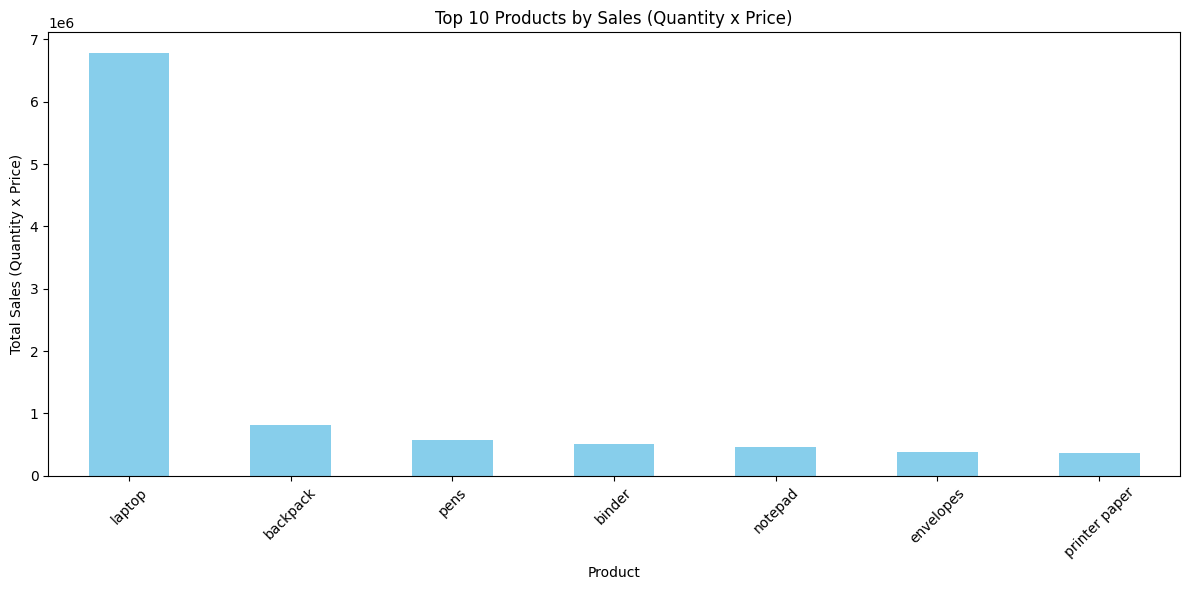

In [84]:
import matplotlib.pyplot as plt

data['productSales'] = data['itemsQuantity'] * data['itemsPrice']
sales_by_product = data.groupby('itemsName')['productSales'].sum()
sorted_sales = sales_by_product.sort_values(ascending=False).head(10)

print(sorted_sales)
#1
# Plot the top 10 products by sales
plt.figure(figsize=(12, 6))
sorted_sales.plot(kind='bar', color='skyblue')
plt.xlabel('Product')
plt.ylabel('Total Sales (Quantity x Price)')
plt.title('Top 10 Products by Sales (Quantity x Price)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### The sales of laptops are the highest, totaling about $6,775,977.07. This suggests that laptops are the most widely used and best-selling products. Due to its relatively high price when compared to other things, laptops may have the highest sales because each one sold makes a considerable contribution to overall sales. The popularity of the laptop among consumers may also be a factor in its strong sales. Although they have lesser sales than laptops, other things including printer paper, pens, binders, notepads, and backpacks also significantly contribute to overall sales.

### 

Top 3 Products by Sales for Each Store Location:


,storeLocation,itemsName,productSales
0,Austin,laptop,1018494.05
1,Austin,backpack,115217.59
2,Austin,pens,74622.52
7,Denver,laptop,1961659.25
8,Denver,backpack,245679.34
9,Denver,pens,185008.39
14,London,laptop,1073098.72
15,London,backpack,144529.14
16,London,pens,92602.30
21,New York,laptop,694613.32


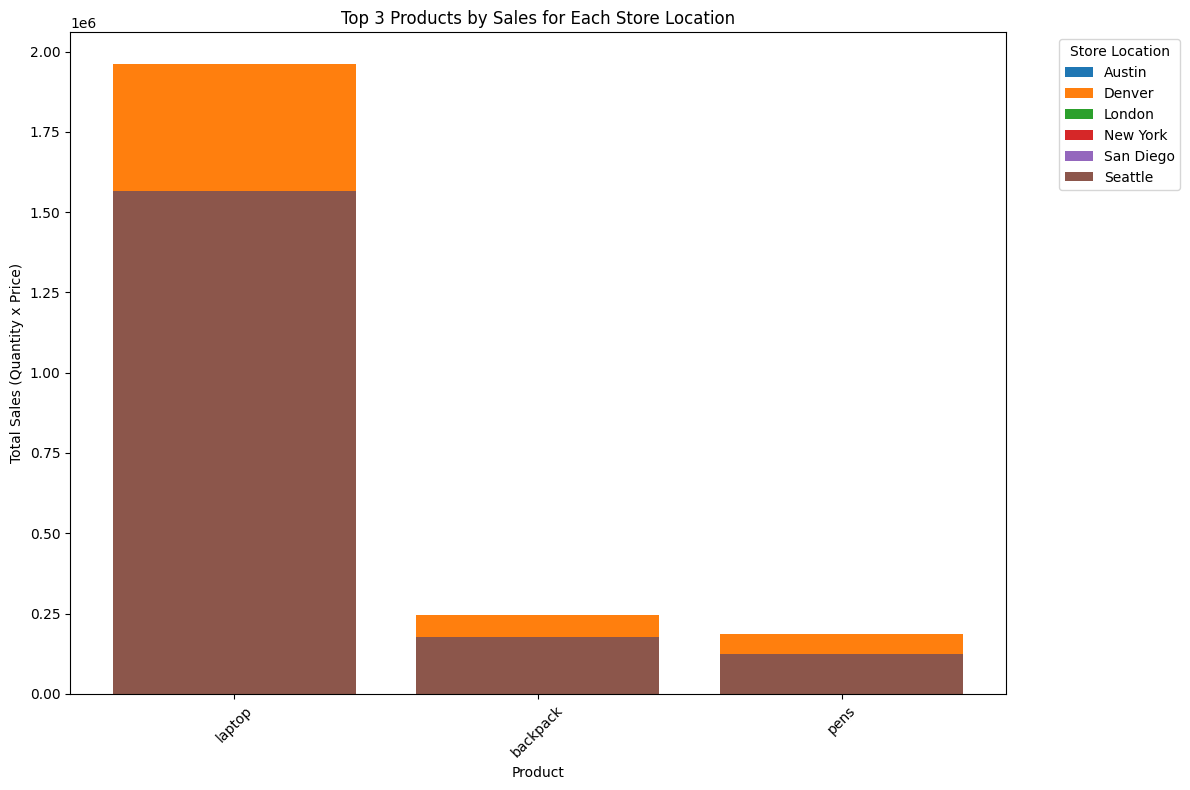

In [86]:
#2
# Calculate sales (quantity x price) for each product
data['productSales'] = data['itemsQuantity'] * data['itemsPrice']

# Group by store location and product, and calculate total sales for each combination
sales_by_location_product = data.groupby(['storeLocation', 'itemsName'])['productSales'].sum()

# Sort the sales in descending order for each store location
sorted_sales_by_location = sales_by_location_product.groupby('storeLocation', group_keys=False).apply(lambda x: x.sort_values(ascending=False)).reset_index()

# Select the top 3 products by sales for each store location
top3_by_location = sorted_sales_by_location.groupby('storeLocation').head(3)

# Display the top 3 products by sales for each store location
print("Top 3 Products by Sales for Each Store Location:")
display(top3_by_location)

# Visualize the top 3 products by sales for each store location
plt.figure(figsize=(12, 8))
for location in top3_by_location['storeLocation'].unique():
    location_data = top3_by_location[top3_by_location['storeLocation'] == location]
    products = location_data['itemsName']
    sales = location_data['productSales']
    plt.bar(products, sales, label=f'{location}')

plt.xlabel('Product')
plt.ylabel('Total Sales (Quantity x Price)')
plt.title('Top 3 Products by Sales for Each Store Location')
plt.legend(title='Store Location', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#####

##### The data displays the combined sales for the top three items at each store location. In particular, the laptop category stands out as the store's best-selling product overall. This indicates that there is a significant demand for laptops worldwide. Additionally, pens and backpacks frequently rank among the best-selling items, demonstrating their popularity across numerous store locations.

Store Rankings based on Total Sales:
              Store Location  Total Sales  Rank
storeLocation                                  
Denver                Denver   2921009.92   1.0
Seattle              Seattle   2255947.69   2.0
London                London   1583066.79   3.0
Austin                Austin   1445603.11   4.0
New York            New York   1016059.59   5.0
San Diego          San Diego    672885.17   6.0


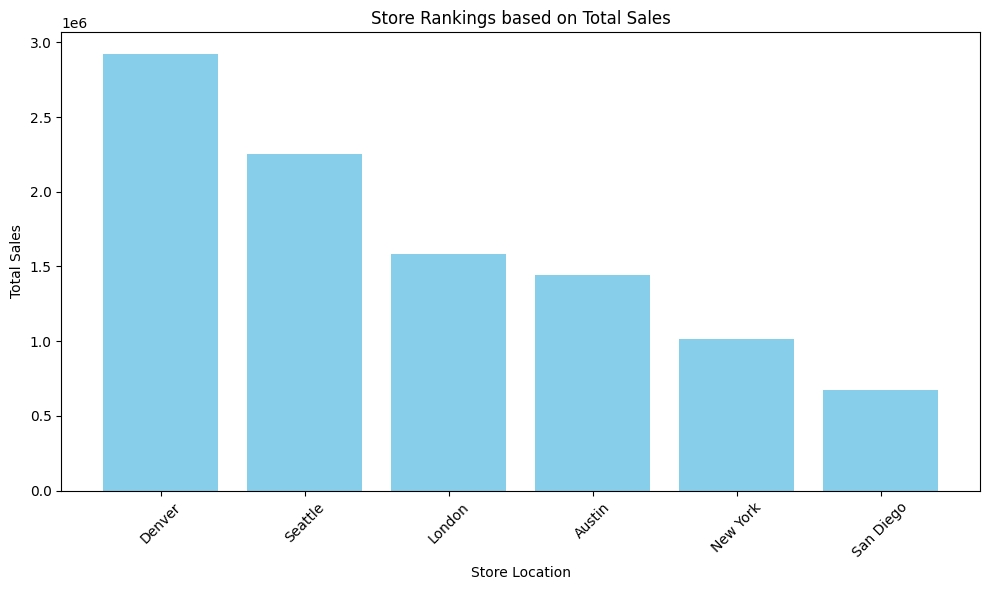

In [63]:
#3 
# Calculate sales (quantity x price) for each product
data['productSales'] = data['itemsQuantity'] * data['itemsPrice']

# Group by store location and calculate total sales for each location
total_sales_by_location = data.groupby('storeLocation')['productSales'].sum()

# Rank the stores based on total sales
store_rankings = total_sales_by_location.rank(ascending=False, method='dense')

# Create a DataFrame to display the rankings
rankings_df = pd.DataFrame({
    'Store Location': total_sales_by_location.index,
    'Total Sales': total_sales_by_location.values,
    'Rank': store_rankings
})

# Sort the rankings by rank
rankings_df = rankings_df.sort_values(by='Rank')

# Display the rankings
print("Store Rankings based on Total Sales:")
print(rankings_df)

# Visualize the rankings
plt.figure(figsize=(10, 6))
plt.bar(rankings_df['Store Location'], rankings_df['Total Sales'], color='skyblue')
plt.xlabel('Store Location')
plt.ylabel('Total Sales')
plt.title('Store Rankings based on Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### The entire sales for each store location are shown in the bar chart, providing valuable insights into their performance. With the highest overall sales of almost 2.92 million, Denver stands out as the best-performing retailer. Seattle is not far behind, which suggests that its sales are also performing nicely. With total sales reaching 1.5 million and 1.4 million, respectively, London and Austin also do well. Despite being a big city, New York only has slightly more than 1 million in total sales. San Diego trails the other retailers in sales, with about 672,885.17.

Purchase Method by Gender Table:
purchaseMethod  Online  Instore
customerGender                 
F                 4270     8062
M                 4314     7571


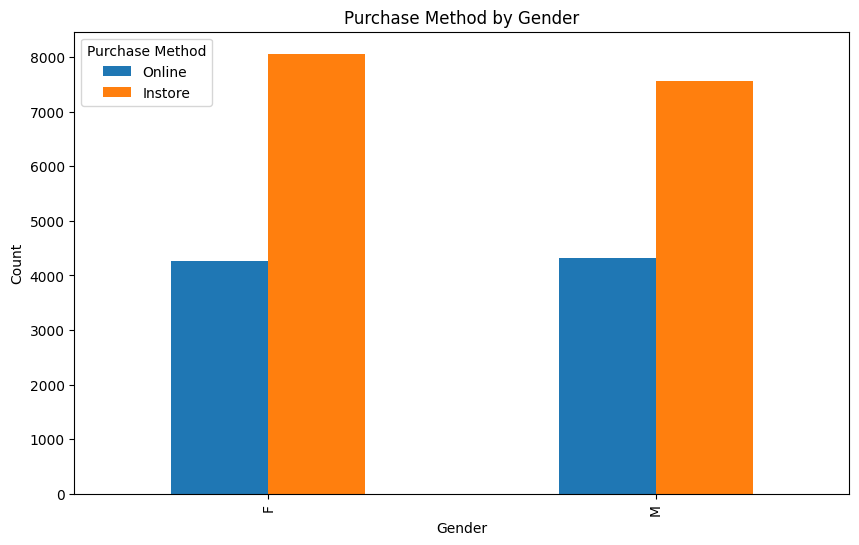

In [87]:
#4
# Replace "In store" with "Instore"
data['purchaseMethod'] = data['purchaseMethod'].replace('In store', 'Instore')

# Filter the data for the specified purchase methods
specified_purchase_methods = ['Online', 'Instore']
filtered_data = data[data['purchaseMethod'].isin(specified_purchase_methods)]

# Group by purchase method and customer gender, and calculate the count for each combination
purchase_by_gender = filtered_data.groupby(['customerGender', 'purchaseMethod']).size().unstack()

# Fill any missing values with 0
purchase_by_gender = purchase_by_gender.fillna(0)

# Reorder the columns to match the desired order
purchase_by_gender = purchase_by_gender[['Online', 'Instore']]

# Display the purchase method by gender table
print("Purchase Method by Gender Table:")
print(purchase_by_gender)

# Plotting the bar graph
ax = purchase_by_gender.plot(kind='bar', figsize=(10, 6))

# Adding labels and title
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Purchase Method by Gender')

# Display the legend
plt.legend(title='Purchase Method')

# Display the plot
plt.show()

##### In this scenario, you can see the distribution of each gender with their prefered way of purchasing. Female contributes the most in buying but also in a typical fashion which is instore. While male also contribute similarly in an instore fashion. Both genders buy online roughly withing the same amount. 

+------------+----------+
|   DateTime |    Sales |
+------------+----------+
| 2013-01-01 | 55900.83 |
| 2013-02-01 | 46694.96 |
| 2013-03-01 | 41829.89 |
| 2013-04-01 | 52384.73 |
| 2013-05-01 | 56996.45 |
| 2013-06-01 | 45976.23 |
| 2013-07-01 | 53129.92 |
| 2013-08-01 | 39097.28 |
| 2013-09-01 | 43148.94 |
| 2013-10-01 | 56294.04 |
| 2013-11-01 | 50838.78 |
| 2013-12-01 |  55496.2 |
| 2014-01-01 | 37734.41 |
| 2014-02-01 | 41838.88 |
| 2014-03-01 |  62115.2 |
| 2014-04-01 | 42655.84 |
| 2014-05-01 | 51343.26 |
| 2014-06-01 | 44208.35 |
| 2014-07-01 | 58578.75 |
| 2014-08-01 | 55639.56 |
| 2014-09-01 | 50622.12 |
| 2014-10-01 | 47720.55 |
| 2014-11-01 | 53066.08 |
| 2014-12-01 |  43919.0 |
| 2015-01-01 | 71409.28 |
| 2015-02-01 | 59066.69 |
| 2015-03-01 |  54721.6 |
| 2015-04-01 | 43251.58 |
| 2015-05-01 | 54413.76 |
| 2015-06-01 | 49794.05 |
| 2015-07-01 | 47414.16 |
| 2015-08-01 | 50184.52 |
| 2015-09-01 | 39524.91 |
| 2015-10-01 | 53819.03 |
| 2015-11-01 | 52996.18 |
| 2015-12-01

C:\Users\aashi.DESKTOP-E6C1U98\AppData\Local\Temp\ipykernel_12048\135945660.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthly_sales_df['DateTime'] = pd.to_datetime(monthly_sales_df['DateTime'])


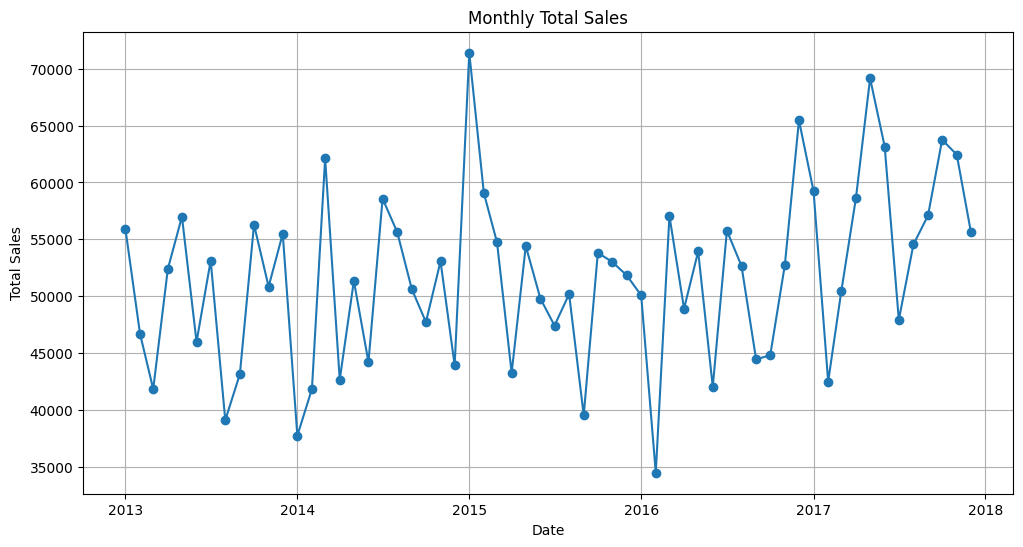

In [89]:
#5 
import pandas as pd
from tabulate import tabulate
# Convert 'saleDate' to datetime and extract month and year
data['saleDate'] = pd.to_datetime(data['saleDate'])
data['year'] = data['saleDate'].dt.year
data['month'] = data['saleDate'].dt.month

# Group by year and month, calculate total sales for each month
monthly_total_sales = data.groupby(['year', 'month'])['itemsPrice'].sum()

# Reset index for tabulating
monthly_total_sales = monthly_total_sales.reset_index()

# Format the 'saleDate' column
monthly_total_sales['DateTime'] = monthly_total_sales.apply(lambda row: f"{int(row['year'])}-{int(row['month']):02d}-01", axis=1)

# Select only necessary columns
monthly_sales_df = monthly_total_sales[['DateTime', 'itemsPrice']]
monthly_sales_df.columns = ['DateTime', 'Sales']

# Display the data in tabular format
table = tabulate(monthly_sales_df, headers='keys', tablefmt='pretty', showindex=False, stralign="right")
print(table)

import matplotlib.pyplot as plt

# Convert the 'DateTime' column to datetime format
monthly_sales_df['DateTime'] = pd.to_datetime(monthly_sales_df['DateTime'])

# Plotting the line graph
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales_df['DateTime'], monthly_sales_df['Sales'], marker='o')

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.title('Monthly Total Sales')

# Display the plot
plt.grid(True)
plt.show()

##### From January 2013 to December 2017, monthly sales data are shown on the line plot chart. It is clear from the chart analysis that there hasn't been a distinct and enduring pattern in sales trends throughout time. However, sales data typically peaks in January of each year, with the exception of 2014, when sales were down from the prior year. A number of things, including post-holiday spending, and an increase in demand for goods following the holiday season, may be responsible for this surge. The largest sale occurred in January 2015, and the lowest in January 2016 as well.